# Dimensional Resemblance Analysis (DRA) Dataset C

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from dimensional_resemblance import preprocess_data
from dimensional_resemblance import pca_transform
from dimensional_resemblance import isomap_transform
from dimensional_resemblance import umap_transform
from dimensional_resemblance import dra_distance

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/C_Obesity_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/C_Obesity_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/C_Obesity_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/C_Obesity_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/C_Obesity_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity_level']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':       Gender  Age  Height  Weight family_history_with_overweight FAVC  \
 0     Female   21    1.63   60.00                            yes  yes   
 1     Female   21    1.75  133.62                            yes  yes   
 2     Female   23    1.66   82.60                            yes  yes   
 3     Female   22    1.59   44.24                             no   no   
 4       Male   26    1.81  106.04                            yes  yes   
 ...      ...  ...     ...     ...                            ...  ...   
 1683    Male   32    1.75  120.10                            yes  yes   
 1684    Male   23    1.72   81.67                            yes  yes   
 1685  Female   23    1.65   80.00                            yes  yes   
 1686  Female   23    1.63   84.50                            yes  yes   
 1687    Male   20    1.82   85.00                            yes  yes   
 
           FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
 0     3.000000  3.00

## 2. Preprocess variables for data reduction

In [5]:
data_scaled = dict()

for name in DATA_TYPES :
    data_scaled[name] = preprocess_data(data[name])
data_scaled

{'Real': array([[-0.53190921, -0.76706698, -1.01941408, ...,  0.        ,
          0.        ,  0.        ],
        [-0.53190921,  0.51916719,  1.80217411, ...,  1.        ,
          0.        ,  0.        ],
        [-0.2234713 , -0.44550844, -0.15323786, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.2234713 , -0.55269462, -0.25288646, ...,  0.        ,
          0.        ,  1.        ],
        [-0.2234713 , -0.76706698, -0.08041774, ...,  0.        ,
          0.        ,  0.        ],
        [-0.68612816,  1.26947046, -0.06125455, ...,  0.        ,
          1.        ,  0.        ]]),
 'GM': array([[-0.44101761,  0.34550598,  0.35123234, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.46998104,  0.90603582,  1.71056743, ...,  0.        ,
          0.        ,  0.        ],
        [-1.20018316,  1.49845689, -0.25505988, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 0.31814793,  0.59931571,  0.05

## 3. Principal Component Analysis (PCA)

In [6]:
pca = dict()
pca['Real'] = pca_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    pca[name] = pca_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
pca

{'Real':            PC1       PC2  Label
 0     0.810191 -0.371216    0.0
 1    -1.959484 -0.131702    0.0
 2     0.938855 -0.495681    0.0
 3     2.364566 -0.099910    0.0
 4    -2.204741 -0.394176    0.0
 ...        ...       ...    ...
 1683 -2.014856  0.706511    0.0
 1684  0.475983 -0.280941    0.0
 1685  0.899947 -0.830067    0.0
 1686  0.718258 -0.076898    0.0
 1687 -1.898706 -1.503217    0.0
 
 [1688 rows x 3 columns],
 'GM':            PC1       PC2  Label
 0     0.864906 -0.032355    1.0
 1     1.745013  1.906867    1.0
 2     0.709997 -1.370010    1.0
 3     1.031350 -0.346226    1.0
 4     0.288950  1.063347    1.0
 ...        ...       ...    ...
 1683  0.637378  0.675728    1.0
 1684  2.144091 -0.095246    1.0
 1685  1.162215  0.190457    1.0
 1686 -1.636428  1.997949    1.0
 1687 -0.611673  0.094593    1.0
 
 [1688 rows x 3 columns],
 'SDV':            PC1       PC2  Label
 0    -1.199144  1.606818    1.0
 1     1.195149 -1.813554    1.0
 2    -0.397535 -0.447566    1.0

GM
- Joint distance:  0.0346
#############################################
SDV
- Joint distance:  0.0612
#############################################
CTGAN
- Joint distance:  0.2841
#############################################
WGANGP
- Joint distance:  0.4693
#############################################


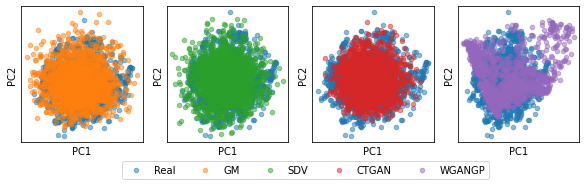

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
pca_real = pca['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    pca_data = pd.DataFrame(data=pca['Real'], columns=['PC1','PC2','Label']).append(pca[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = pca_data['Label'] == target
        handles = ax.scatter(pca_data.loc[indicesToKeep, 'PC1'], pca_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        pca_synthetic = pca[name][['PC1','PC2']]
    
    print(name)
    joint_dist = dra_distance(pca_real, pca_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/PCA_PLOTS.png', bbox_inches='tight')

## 4. ISOMAP

In [8]:
isomap = dict()
isomap['Real'] = isomap_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    isomap[name] = isomap_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
isomap

{'Real':            PC1       PC2  Label
 0     1.065847  3.045635    0.0
 1     0.719022  0.339547    0.0
 2    -1.056511  8.145961    0.0
 3     5.545429  6.919593    0.0
 4    -3.875490 -6.318258    0.0
 ...        ...       ...    ...
 1683 -9.823536 -4.984379    0.0
 1684 -0.673528 -1.258774    0.0
 1685 -0.448088 -1.175746    0.0
 1686 -0.850102  3.017405    0.0
 1687 -1.560686 -4.038725    0.0
 
 [1688 rows x 3 columns],
 'GM':            PC1       PC2  Label
 0    -0.620313  3.980876    1.0
 1    -3.245326  1.989831    1.0
 2    -1.230722 -0.775000    1.0
 3    -2.203457 -1.170709    1.0
 4     1.137525  3.080211    1.0
 ...        ...       ...    ...
 1683 -1.739076  2.270562    1.0
 1684 -5.307413  2.544668    1.0
 1685 -1.535636  1.319561    1.0
 1686  2.176133  5.397212    1.0
 1687  1.981315  3.010944    1.0
 
 [1688 rows x 3 columns],
 'SDV':            PC1       PC2  Label
 0    -2.868277 -1.308131    1.0
 1     2.001432  3.932964    1.0
 2     2.804699  1.129808    1.0

GM
- Joint distance:  1.8873
#############################################
SDV
- Joint distance:  2.22
#############################################
CTGAN
- Joint distance:  1.7075
#############################################
WGANGP
- Joint distance:  0.5535
#############################################


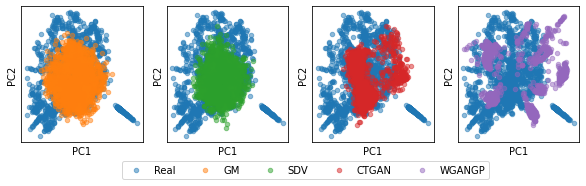

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
isomap_real = isomap['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    isomap_data = pd.DataFrame(data=isomap['Real'], columns=['PC1','PC2','Label']).append(isomap[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = isomap_data['Label'] == target
        handles = ax.scatter(isomap_data.loc[indicesToKeep, 'PC1'], isomap_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        isomap_synthetic = isomap[name][['PC1','PC2']]
        
    print(name)
    joint_dist = dra_distance(isomap_real, isomap_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/ISOMAP_PLOTS.png', bbox_inches='tight')